# Lets build a model them model the growth of cancer cell

### using SCINTIFIC AND   COMPUTING  METHOD 

## 🧬 Gompertzian Model for Tumor Growth

This model describes the growth dynamics of a tumor, often incorporating the effects of treatment.

### A Simple ODE (Ordinary Differential Equation)

The core equation for the model is:

$$
\frac{dT}{dt} = r T \ln\left(\frac{K}{T}\right) - c(t)T
$$

---

### Parameter Definitions

Here is a breakdown of each component in the equation:

* **$T(t)$ (Tumor Size)**
    * **Represents:** The size of the tumor at a given time $t$.
    * **Can be measured as:**
        * Number of cancerous cells
        * Tumor volume (e.g., in $mm^3$ or $cm^3$)
        * Normalized fraction (e.g., a value between 0 and 1)

* **$r$ (Tumor Growth Rate)**
    * **Represents:** How fast the tumor grows, particularly when it is small.
    * **Units:** Typically `per day` (or inverse time, $time^{-1}$).
    * **Biological Influences:**
        * Cell division rate
        * Nutrient availability
        * Angiogenesis (Blood Supply Formation)

* **$K$ (Carrying Capacity)**
    * **Represents:** The maximum tumor size that the surrounding environment can sustain.
    * **Units:** Same units as $T(t)$ (e.g., volume, cell count, or normalized size).
    * **Why growth stalls at this point:**
        1.  Lack of nutrients
        2.  Limited space
        3.  Immune system pressure

* **$c(t)$ (Chemotherapy-Induced Kill Rate)**
    * **Represents:** The rate at which chemotherapy (or any anti-cancer intervention) kills tumor cells over time.
    * **Function:** It reduces the growth of the tumor by introducing a negative pressure on the population of cancerous cells.

##### The taradiational deep learning model act as  block box and does not understand the mechanistic model behind the working of model

# **WHY NOT TO BAKE THE KNOW PYSCICAL STRUCTURE WITH THE NEURAL NETWORK**

## 🧠 Universal Differential Equations (UDE)

This approach combines known scientific models with machine learning to create more powerful predictive tools.

### The Hybrid Equation

Instead of using unknown fixed parameters, we embed neural networks directly into the differential equation to learn the complex, unknown parts.

$$
\frac{dT}{dt} = \text{[Neural Network}_1\text{]} \cdot T \cdot \ln\left(\frac{\text{[Neural Network}_2\text{]}}{T}\right) - c(t)T
$$

### Guiding Philosophy

> Why should we throw our knowledge away?
>
> Here we leverage the **"science"** of tumor growth and **"power"** of ML.

---

### The Core Concept

A Universal Differential Equation (UDE) is the fusion of these two fields:

**Differential Equations** + **Neural Network** = **Universal Differential Equations**

## 🚀 The UDE Training Workflow: From Guess to Forecast

This is the step-by-step "engine" that trains the model. It's a loop that connects the neural networks, the differential equation, and the real-world data.

### 1. The "Forward Pass" ➡️: (Prediction & Simulation)

This is where the model makes its *first guess*. It flows in this order:

1.  **Input:** Start with the *current* known tumor size, $T$. (At the very beginning, this is the initial size $T_0$).
2.  **NN Prediction:** You feed this $T$ into the two neural networks (NNs) *simultaneously*:
    * `NN1` (with its current random "knobs") predicts a value for the growth rate $r$.
    * `NN2` (with *its* current random "knobs") predicts a value for the carrying capacity $K$.
3.  **Build the Equation:** These predicted values, $r_{pred}$ and $K_{pred}$, are plugged into the Gompertz equation. Now you have a *complete* equation with *specific numbers*:
    $$
    \frac{dT}{dt} = r_{pred} \cdot T \cdot \ln\left(\frac{K_{pred}}{T}\right) - c(t)T
    $$
4.  **Numerical Analysis (Integration):** The equation above only gives you the *speed* ($\frac{dT}{dt}$). To get the *size* over time, you must solve it. A computer does this using numerical integration.
    * It starts at $T_0$.
    * It uses the equation to find the speed.
    * It takes a tiny step forward in time (e.g., 0.1 days) to predict the new size, $T_1$.
    * It repeats this process (using $T_1$ to find the speed for $T_2$, etc.) until it has generated a **full predicted tumor size curve** ($T_{predicted}$) over all 50 days.

---

### 2. The "Backward Pass" ⬅️: (Calculating & Minimizing Loss)

This is the "learning" part. The model compares its *guess* to the *reality*.

5.  **Calculate Loss:** The model now compares its predicted curve ($T_{predicted}$) with the **actual data** ($T_{true}$). It uses a **Loss Function** (e.g., Mean Squared Error) to get a single number for how "wrong" it was.
    * **Formula:** $\text{Loss} = \text{Average of } (T_{predicted} - T_{true})^2 \text{ for all time points}$.
    * A **high loss** means the guess was terrible.
    * A **low loss** means the guess was good.

6.  **Backpropagation (The "Magic"):** This is the core of "minimizing the loss."
    * The optimizer (like LBFGS) looks at the final `Loss` number.
    * It calculates *how much* each individual "knob" (weight and bias) *inside* `NN1` and `NN2` contributed to that final error.
    * It then **"nudges" all the knobs** in the direction that would have made the error smaller.

---

### 3. The Loop 🔁: (Repeat to Improve)

7.  **Iterate:** The entire process (Steps 1-6) is one "iteration" or "epoch." The model then **repeats this loop** hundreds or thousands of times.
    * **Loop 2:** The NNs (with their newly nudged knobs) make a *slightly better* prediction for $r$ and $K$.
    * **Loop 3:** The predicted curve $T_{predicted}$ is now *slightly closer* to the true data $T_{true}$.
    * **Loop 4:** The `Loss` is *slightly smaller*.
    * ...
    * **Loop 50:** After many iterations, the NNs have "learned" to predict the *true* underlying $r$ and $K$ values. The predicted curve ($T_{predicted}$) will now almost perfectly overlap with the real data ($T_{true}$), and the `Loss` will be very close to zero.

---

### 🏁 The Result: A Trained Model

You now have a fully trained UDE. The neural networks have "discovered" the hidden biological parameters ($r$ and $K$) for this specific tumor, just by looking at the size data.

In [1]:
using DifferentialEquations, JLD, DiffEqFlux

In [52]:
N_days = 5
 T0=0.05 # Intial tumor size (normalized) --- ( 1-0) ----> this means the currently it is at 5% of its max growth

p0=[0.5,1.0,1]
u0=[T0] #---- >  initial size -- 0.05
tspan = (0.0, Float64(N_days))

t=range(tspan[1],tspan[2],length=N_days) # this creates a set of number form this range


function tumor_growth_chemo!(du, u, p, t)  # a function to solve the odinaryDE
    T=max(u[1],0) # ----> in julia u[1]--: T||du[1] --: dT/dt
    r, K , c   = abs.(p) # unpacking the parameter 
        du[1] =  r*T*log(K/T)  - c * sigmoid(t/5) * T  # du[1] --: dT/dt || 
        #c (it is the maximum possible strength) - 2 ( which is max ) and the sigmoid is used to slowly increase the strength to maximum  (2*sigmoid(0.5) = 1) ||
        #-->  r*T*log(K/T) -- growth engin
        # The  Whole story is to [ c * sigmoid(t/5) * T ] -- model the realistic growth strength

        
end




tumor_growth_chemo! (generic function with 1 method)

Since, we did not  have data we will go with creating the synthetic data

In [53]:
sigmoid(x) = 1 / (1 + exp(-x))

sigmoid (generic function with 1 method)

In [54]:
prob=ODEProblem(tumor_growth_chemo!, u0,tspan, p0)
true_sol = Array(solve(prob, Tsit5(), saveat=t))

1×5 Matrix{Float64}:
 0.05  0.122432  0.18678  0.221798  0.231208

In [55]:
true_sol

1×5 Matrix{Float64}:
 0.05  0.122432  0.18678  0.221798  0.231208

In [56]:
using Plots

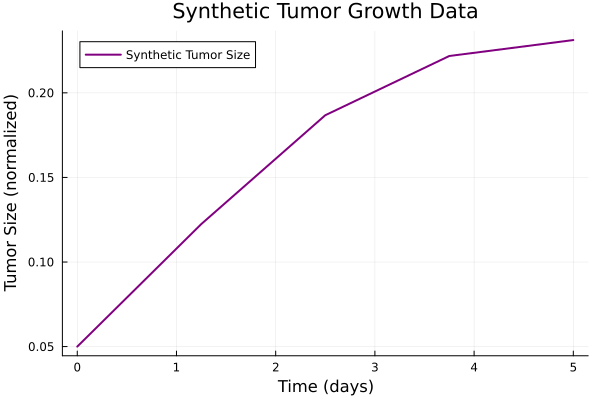

In [57]:

plot(t, true_sol[1, :],
     label = "Synthetic Tumor Size",
     linewidth = 2,
     color = :purple)

xlabel!("Time (days)")
ylabel!("Tumor Size (normalized)")
title!("Synthetic Tumor Growth Data")

# Now we are creating the UDE to solve the equation

$$
    \frac{dT}{dt} = r_{pred} \cdot T \cdot \ln\left(\frac{K_{pred}}{T}\right) - c(t)T
    $$

In [58]:
using Random, ComponentArrays

In [59]:
rng=Random.default_rng()

# both the two neural network

NN_r=Lux.Chain(Lux.Dense(1,10, relu), Lux.Dense(10, 1))
NN_k=Lux.Chain(Lux.Dense(1,10, relu), Lux.Dense(10, 1))

p1,st1 = Lux.setup(rng, NN_r)   # p are parameter that are to be optimized during training

p2, st2 = Lux.setup(rng, NN_k)   # st - these are not trainanble parameter they just sotre the things like  batch norm
p0_vec = (layer_r = p1, layer_k = p2)  # this convert the parameters into --> p0_vec = (
                                       #                                                 layer_r = (weight = 1.1, bias = 2.2),
                                       #                                                 layer_k = (weight = 3.3, bias = 4.4)
                                       #                                                 )
p0_vec = ComponentArray(p0_vec)     
## What the optimizer sees:
#  [1.1, 2.2, 3.3, 4.4]

## Your code can still do this:
# julia> p0_vec.layer_r
# (weight = 1.1, bias = 2.2)---> HUMAN READABLE 

# julia> p0_vec.layer_k.bias ---> optimizer READABLE
# 4.4


ComponentVector{Float32}(layer_r = (layer_1 = (weight = Float32[1.4668242; 0.38481238; … ; -0.31260508; 3.4584684;;], bias = Float32[-0.74494135, -0.3227774, 0.19592714, 0.4242742, -0.44168103, -0.42247128, 0.70890903, -0.5063226, 0.45227516, -0.3281554]), layer_2 = (weight = Float32[-0.18626238 0.1475009 … -0.4557233 0.49051517], bias = Float32[-0.27975893])), layer_k = (layer_1 = (weight = Float32[1.5502981; 1.7407972; … ; 2.9735563; -1.3894732;;], bias = Float32[0.6868031, 0.8039191, 0.66028583, -0.06654155, 0.5345813, -0.16626167, 0.20979941, 0.014272571, -0.6455519, 0.8085644]), layer_2 = (weight = Float32[0.51259536 0.51493186 … 0.03219289 -0.21888177], bias = Float32[-0.107723765])))

In [60]:
function  my_softplus(x)
    return log(1 + exp(x))
    
end

my_softplus (generic function with 1 method)

In [61]:
function tumor_UDE!(du,u,p,t)
    T=max(u[1] , 0)  # so that the growth of the tumor cannot be negative

    r_out , _ = NN_r([T] , p.layer_r , st1)  # getting the parameter from the neural network
    k_out , _ = NN_k([T] , p.layer_k , st2) # Changed NN_r to NN_k

    r = clamp(my_softplus(r_out[1]), 1e-4, 1.0)
    K = clamp(my_softplus(k_out[1]), 0.01, 1.0) # Changed K_out to k_out

    du[1]=r*T*log(K/T)-p0[3]*sigmoid(t/5)*T
end

ude_prob = ODEProblem(tumor_UDE!,u0,tspan,p0_vec)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (0.0, 5.0)
u0: 1-element Vector{Float64}:
 0.05

### The loss function 

In [62]:
function loss_function(p)
    sol=solve(ude_prob, u0=u0, p=p , saveat=t, sensealg=QuadratureAdjoint()) # solving the UDE prob
    if any(x -> any(isnan,x)    ,sol.u) || length(sol.t) != length(t) 
        return Inf
    end

    return sum( abs2 , sol[1, :] .- true_sol[1, :])
end


# The if statement if (Condition 1) || (Condition 2) means: "If the solution contains a NaN OR if the solver didn't finish the full time span..."
# In our "Bad" example, both conditions were true, so the function would return Inf, and the optimizer would know its last attempt was a complete failure.
# end

loss_function (generic function with 1 method)

### Optimzing the Neural Network


In [63]:
using Optimization, OptimizationOptimJL

In [64]:
opt_func = OptimizationFunction((x,p) -> loss_function(x) , Optimization.AutoZygote() )  #  Creating an Optimization prob 
opt_prob = OptimizationProblem(opt_func, p0_vec)  # otimizing the parameter
trained_params = solve(opt_prob, OptimizationOptimJL.LBFGS(); maxiters=100)

retcode: Success
u: ComponentVector{Float32}(layer_r = (layer_1 = (weight = Float32[1.4668242; 0.38481238; … ; -0.27379766; 3.408715;;], bias = Float32[-0.74494135, -0.3227774, 0.22517736, 0.2785937, -0.3461292, -0.62351924, 0.70903456, -0.5063226, 0.43110433, -0.47631186]), layer_2 = (weight = Float32[-0.18626238 0.1475009 … -0.4110216 0.219768], bias = Float32[-0.25241846])), layer_k = (layer_1 = (weight = Float32[1.5502981; 1.7407972; … ; 2.9735563; -1.3894732;;], bias = Float32[0.6868031, 0.8039191, 0.66028583, -0.06654155, 0.5345813, -0.16626167, 0.20979941, 0.014272571, -0.6455519, 0.8085644]), layer_2 = (weight = Float32[0.51259536 0.51493186 … 0.03219289 -0.21888177], bias = Float32[-0.107723765])))

In [65]:
size(trained_params)

(62,)

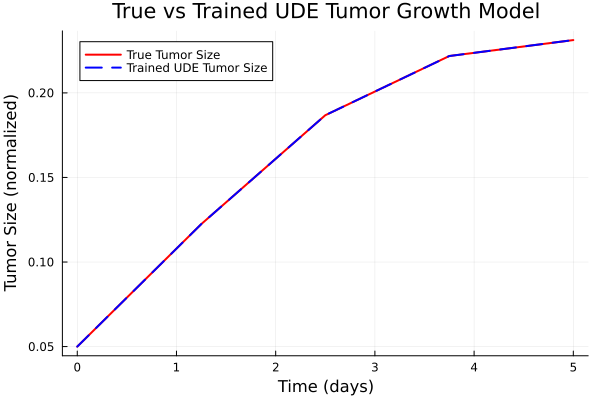

In [66]:
# ============================
# 5. Evaluation and Plotting
# ============================
trained_sol = solve(ude_prob, Tsit5(), p=trained_params.u, saveat=t)

plot(t, true_sol[1, :], label="True Tumor Size", linewidth=2, color=:red)
plot!(t, trained_sol[1, :], label="Trained UDE Tumor Size", linewidth=2, linestyle=:dash, color=:blue)

xlabel!("Time (days)")
ylabel!("Tumor Size (normalized)")
title!("True vs Trained UDE Tumor Growth Model")

## Extrapolation

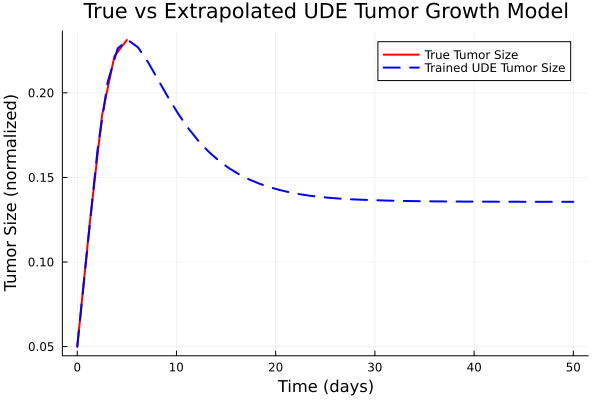

In [68]:
# ============================
# 6. Extrapolation
# ============================

N_days2 = 50
tspan2 = (0.0, Float64(N_days2))  
t2 = range(tspan2[1], tspan2[2], length=N_days2)

ude_prob2 = ODEProblem(tumor_UDE!, u0, tspan2, p0_vec)
trained_sol2 = solve(ude_prob2, Tsit5(), p=trained_params.u, saveat=t2)

plot(t, true_sol[1, :], label="True Tumor Size", linewidth=2, color=:red)
plot!(t2, trained_sol2[1, :], label="Trained UDE Tumor Size", linewidth=2, linestyle=:dash, color=:blue)

xlabel!("Time (days)")
ylabel!("Tumor Size (normalized)")
title!("True vs Extrapolated UDE Tumor Growth Model")

# Next step is symbolic discovery 

Here is a detailed, step-by-step roadmap for **Phase 5: The "Discovery" Step**, explaining the process without any code.

This is the final phase where we transform our trained, predictive "black box" UDE into an interpretable, "white box" scientific law.

---

### Step 1: "Interrogate" the Trained Neural Networks

**Goal:** To create a clean, simple dataset of what our "black box" models have learned.

Before we can find the equation hidden inside `NN_r`, we need to know what it *does*. We will "interview" the trained network by feeding it a wide range of inputs and recording its outputs.

1.  **Create Inputs:** Generate a list of all possible tumor sizes, $T$. For example, 100 points ranging from 1% of the tumor size up to 100% (`T=0.01` to `T=1.0`).
2.  **Feed Forward:** Pass each of these `T` values, one by one, into your *fully trained* `NN_r` and `NN_K` networks.
3.  **Record Outputs:** Collect the corresponding "learned" $r$ and $K$ values that the networks predict for each $T$.
4.  **Result:** You now have two new, clean datasets:
    * **Dataset 1:** A list of `T` values and their corresponding $r$ values.
    * **Dataset 2:** A list of `T` values and their corresponding $K$ values.

Using our analogy: The trained UDE was the "audio engineer" that cleaned up the "noisy recording" (the raw data). We have now used that engineer to produce a **clean, isolated "melody"**—this is our new dataset.

### Step 2: Define a "Library of Guesses" (The Basis Functions)

**Goal:** To give the symbolic regression tool a "menu" of mathematical building blocks to choose from.

The symbolic regression tool can't just invent math from scratch. We must give it a "library" of candidate terms we *hypothesize* might be in the final, simple equation.

1.  **Choose Variables:** Our NNs only used one input: $T$ (tumor size).
2.  **Create a "Library":** Create a list of simple mathematical functions of $T$. This list (called a "basis") is our "list of guesses":
    * A constant (e.g., `c`)
    * A linear term ($T$)
    * A quadratic term ($T^2$)
    * A logarithmic term ($\log(T)$)
    * ...and so on.
3.  **Hypothesis:** We are now formally stating our hypothesis: "We believe the *true* equation for $r$ is a simple combination of these terms."

Analogy: We are giving the "musical transcriber" (the SR tool) a **list of allowed musical notes** (C, G, E) and symbols (whole note, half note) to use.

### Step 3: Run the Sparse Regression Solver

**Goal:** To find the *simplest possible equation* from our "library" that matches the "melody" from Step 1.

We now aim our symbolic regression tool at the "interview" data from Step 1 and tell it to use the "library" from Step 2.

1.  **Set the Problem:** We tell the solver, "Find an equation from the *library* that, when given an input $T$, produces the *output* $r$ from our 'interview' dataset."
2.  **Enforce Simplicity (Sparsity):** We use a "sparse" solver (like `STLSQ` in the video). "Sparse" means the solver is heavily rewarded for finding an answer that **uses the fewest terms possible**. It actively tries to set the coefficients for most of the "guesses" (like $T$, $T^2$) to zero.
3.  **Find the "Best" Equation:** The solver will run, test all the simple combinations, and find the one that perfectly matches the "melody" while also being the simplest. This is **Occam's Razor** in action.
4.  **Result:** The solver will output a human-readable, symbolic equation. For example, after analyzing the data for $r$, it will discover:
    $$
    r = 0.5
    $$
    (It found that the coefficients for $T$, $T^2$, $\log(T)$, etc., were all zero). When you run it again for $K$, it will discover:
    $$
    K = 1.0
    $$

Analogy: The "transcriber" listens to the "melody" and realizes it's just a single, held note. It "discovers" the simple "sheet music" (`r = 0.5`).

### Step 4: Validate the "White Box" Model (The Final Proof)

**Goal:** To prove that our "discovered" simple equation is just as accurate as our complex "black box" UDE.

This is the final "mic drop" moment.

1.  **Build the "Discovered" Model:** Go back to your *original* Gompertz equation from Phase 1.
2.  **Plug In the "Discovered" Laws:** *Replace* the unknown $r$ and $K$ with the simple, constant values we just discovered in Step 3.
3.  **Run the Simulation:** Run this new, fully "white box" simulation (which uses no NNs at all) over the full-time span.
4.  **Plot All Three:** Create a final graph that plots:
    * **Line 1 (Red):** The original "Ground Truth" data.
    * **Line 2 (Blue Dashed):** The "Black Box" UDE prediction.
    * **Line 3 (Green Dotted):** Your new, "Discovered White Box" model.

If all three lines overlap perfectly, you have successfully completed the entire journey. You have used data to train a complex "black box" AI, and then used that AI to discover the simple, interpretable, **true scientific law** that was hidden in the data all along.